<a href="https://colab.research.google.com/github/WonJunPark/2019-G-Software-Challenge/blob/master/2019GsoftwareChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2019 G-Software Challenge (아르테크네센터)

## 워드클라우드 분석을 활용한 스팸 메일 판별 시스템

### 2019년 12월 30일

*********************
개발 배경 : 스팸 메일로 인한 개인 정보 유출 및 악성프로그램 피해 증가

개발 목적 : 워드클라우드 분석을 통해 스팸 메일의 패턴을 파악함으로써 금융 사기 예방

**********************
tool : google colab

version : python 3.6

made in : import.위드

dataset : https://dacon.io/kbdownload



# 1. 라이브러리 및 데이터 업로드


In [0]:
import pandas as pd # 데이터 조작 및 분석
import numpy as np # 수치 계산
from collections import Counter #카운팅

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
!ls "/content/gdrive/My Drive/spam

/bin/bash: -c: line 0: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 1: syntax error: unexpected end of file


In [30]:
cd /content/gdrive/My Drive/spam

/content/gdrive/My Drive/spam


In [31]:
data = pd.read_csv("spam.csv")
data.head()

,id,year_month,text,smishing
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0


# 2. spam 데이터 추출

In [32]:
Counter(data['smishing'])

Counter({0: 277242, 1: 18703})

In [0]:
spam_data = data[data['smishing']==1] #spam 데이터 추출

In [34]:
spam_data2 = spam_data[['text']] #text 추출
spam_data2.head()

,text
9,(광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준...
23,(광고)XXX추가 XXX품 특판 안내문XXX 지점에서 취급하고 있는 여신 XXX...
31,(광고)XXX신용관리 XXX 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가...
40,(광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...
50,(광고)한국citi bank 나의 대출한도와 금리는? 대출때문에 고민하고 있다거나 ...


# 3. Mecab 다운로드 (형태소 분석기)

In [35]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git

fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.


In [36]:
ls

CookieRun_Black.ttf  logo3.png  Mecab-ko-for-Google-Colab/  spam.csv
logo2.jpeg           logo.jpeg  pika.jpeg


In [37]:
cd Mecab-ko-for-Google-Colab/

/content/gdrive/My Drive/spam/Mecab-ko-for-Google-Colab


In [38]:
ls

images/  install_mecab-ko_on_colab190912.sh  README.md


In [15]:
! bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.8MB/s 
     |████████████████████████████████| 92kB 9.9MB/s 
     |████████████████████████████████| 491kB 57.5MB/s 
  Created wheel for JPype1: filename=JPype1-0.7.1-cp36-cp36m-linux_x86_64.whl size=2448800 sha256=c13030fb59e1694c7be805cd018775fb6eacd21073e6be975c6c0cff02f4e47a
  Stored in directory: /root/.cache/pip/wheels/b0/49/6a/4393ef8542c00becf80691bd242693db9e263d6e499323a984
Successfully built JPype1
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2019-12-30 09:12:30--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.

# 4. 토큰화 및 불용어 처리

In [0]:
import konlpy
from konlpy.tag import Mecab

tokenizer = Mecab()

In [0]:
spam_data3 = [ ( tokenizer.pos(i) ) for i in spam_data2['text']]  # Mecab를 활용하여 text를 토큰화 시킴

태그표 참고: http://kkma.snu.ac.kr/documents/?doc=postag

In [41]:
spam_data3[0] #(토큰,형태소 품사 태그표) NNG:일반명사,JKO:목적격 조사, MAG:일반부사, SL:외국어

[('(', 'SSO'),
 ('광고', 'NNG'),
 (')', 'SSC'),
 ('XXXBaXXX', 'SL'),
 ('고객', 'NNG'),
 ('님', 'XSN'),
 ('들', 'XSN'),
 ('뒤', 'NNG'),
 ('엔', 'JKB+JX'),
 ('XXX', 'SL'),
 ('언제나', 'MAG'),
 ('XXX', 'SL'),
 ('새로운', 'VA+ETM'),
 ('마음가짐', 'NNG'),
 ('으로', 'JKB'),
 ('새롭', 'VA'),
 ('게', 'EC'),
 ('준비', 'NNG'),
 ('합니다', 'XSV+EF'),
 ('.', 'SF'),
 ('당', 'NNG'),
 ('행상', 'NNG'),
 ('품', 'NNG'),
 ('의', 'JKG'),
 ('자격', 'NNG'),
 ('기준', 'NNG'),
 ('과', 'JC'),
 ('심사', 'NNG'),
 ('기준', 'NNG'),
 ('이', 'JKS'),
 ('완화', 'NNG'),
 ('되', 'XSV'),
 ('어', 'EC'),
 ('상품', 'NNG'),
 ('에', 'JKB'),
 ('대해', 'VV+EC'),
 ('간단', 'XR'),
 ('하', 'XSA'),
 ('게', 'EC'),
 ('상품', 'NNG'),
 ('정보', 'NNG'),
 ('전달', 'NNG'),
 ('드립니다', 'VV+EF'),
 ('.', 'SF'),
 ('수신', 'NNG'),
 ('을', 'JKO'),
 ('희망', 'NNG'),
 ('하', 'XSA'),
 ('지', 'EC'),
 ('않', 'VX'),
 ('으실', 'EP+ETM'),
 ('경우', 'NNG'),
 ('에', 'JKB'),
 ('는', 'JX'),
 ('거부', 'NNG'),
 ('라는', 'VCP+ETM'),
 ('답장', 'NNG'),
 ('을', 'JKO'),
 ('주', 'VV'),
 ('시', 'EP'),
 ('면', 'EC'),
 ('KISA', 'SL'),
 ('수신', 'NNG'),
 (

In [0]:
spam_stopwords = ['하','시','XXX', '%','.','주','에','의', '을', '를', '이', '가',
                  '1','2','3','4','5','6','7','8','9','0','습니다','로','있','고',
                  '만','되','면','인','한','원','겠','들','해','어','및','수','게',
                  '내','지','대','도','중','과','입니다','신','기','실','건','균',
                  '보','연','님','세','보내','할','적','저','받','여','알','아', 
                  '은', '는', '사','나', '와','분','으로','헙니다', '않','-', 
                  '년','금융','권','에서','(', ')', ':', '!', '?', ')-', '.-', 
                  'ㅡ', 'XXXXXX', '..','.(' ] 
#필요없는 단어 리스트, 아래 spam_data5 결과 확인하면서 불용어 추가

In [0]:
spam_data4 = []
for spam in spam_data3:
  for word,tag in spam:
    if word not in spam_stopwords:
      spam_data4.append(word)

In [0]:
count = Counter(spam_data4)

In [0]:
spam_data5 = dict(count.most_common())

In [46]:
spam_data5 #확인 후 spam_stopwords로 돌아가서 불용어 추가

{'가능': 78999,
 '상품': 76777,
 '금리': 65964,
 '대출': 62950,
 '등급': 62202,
 '상담': 60605,
 '신용': 46895,
 '한도': 45410,
 '은행': 41536,
 '드립니다': 38975,
 '까지': 38473,
 '신청': 38333,
 '드리': 32705,
 '부채': 32088,
 '진행': 31482,
 '합니다': 30258,
 '통합': 29525,
 '문자': 28364,
 '거부': 27702,
 '이상': 25635,
 '추가': 24182,
 '직장': 24081,
 '전화': 23896,
 '광고': 23472,
 '전환': 23155,
 '사용': 23077,
 '방식': 22699,
 '방법': 22621,
 '월': 22407,
 '많': 21298,
 '수신': 21289,
 '론': 20086,
 '이자': 19992,
 '자격': 19970,
 '이용': 19556,
 '자금': 19384,
 '거나': 19247,
 '안내': 19151,
 '대환': 18992,
 '자': 18863,
 '적용': 18689,
 '등': 18530,
 '안': 18379,
 '최대': 18192,
 '원리금': 17812,
 '고객': 17556,
 '카드': 17203,
 '세요': 16902,
 '라고': 16830,
 '없': 16682,
 '차등': 16610,
 '다면': 15877,
 '따라': 15868,
 '조건': 15621,
 '채무': 15305,
 '지원': 15258,
 '도움': 15032,
 '관리': 14869,
 '상환': 14812,
 '답장': 14604,
 '자체': 14516,
 '건수': 14015,
 '서비스': 13489,
 '최저': 13389,
 '억': 13155,
 '대비': 13046,
 '번': 12822,
 '조회': 12630,
 '무료': 12554,
 '낮': 12485,
 '셔서': 12189,
 '접수': 1174

# 5. 워드클라우드 시각화

In [0]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
from PIL import Image

In [48]:
cd /content/gdrive/My Drive/spam

/content/gdrive/My Drive/spam


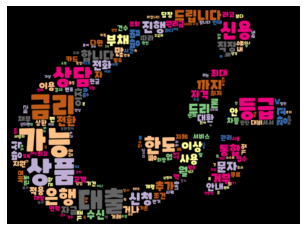

<Figure size 720x720 with 0 Axes>

In [49]:
icon = Image.open('logo.jpeg')
mask = Image.new('RGB', icon.size,(255,255,255))
mask.paste(icon,icon)
logo_mask = np.array(mask)

wordcloud = WordCloud(font_path = 'CookieRun_Black.ttf',
                      background_color='black',
                      colormap = "Accent_r",
                      mask = logo_mask,
                      width=300, height=300,
                      max_words = 200).generate_from_frequencies(spam_data5)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.figure(figsize=(10,10))
plt.show()